In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from skimage.util import random_noise

Saving chest_xray_image.png to chest_xray_image.png


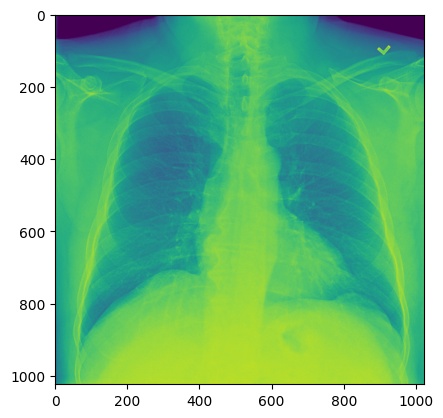

In [2]:
# Step 1: Upload grayscale image
uploaded = files.upload()
file_name = next(iter(uploaded))
img_data = np.frombuffer(uploaded[file_name], np.uint8)
gray = cv2.imdecode(img_data, cv2.IMREAD_GRAYSCALE)
plt.imshow(gray)

In [3]:
# Step 2: Add Noise
gaussian_noise = (random_noise(gray, mode='gaussian') * 255).astype(np.uint8)
sp_noise = (random_noise(gray, mode='s&p') * 255).astype(np.uint8)
speckle_noise = (random_noise(gray, mode='speckle') * 255).astype(np.uint8)

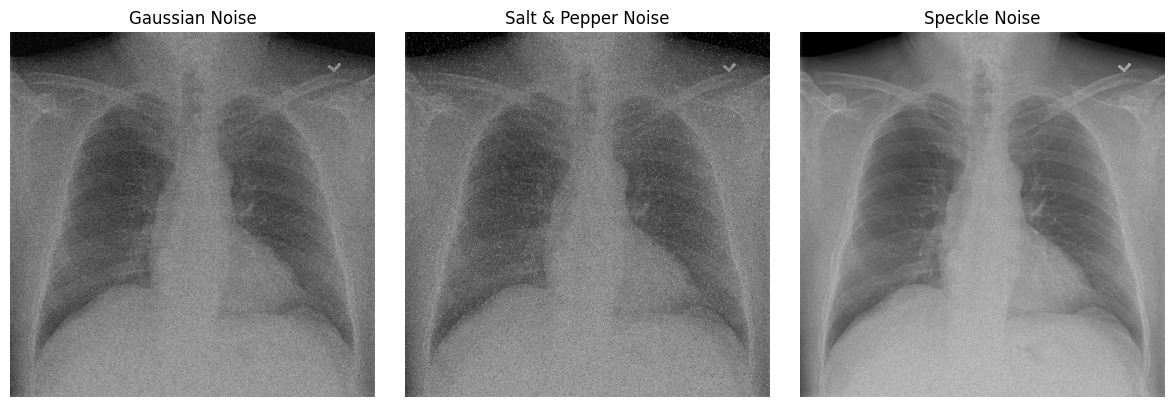

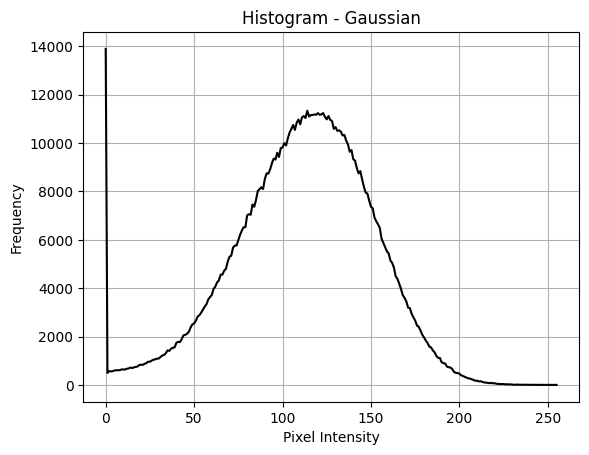

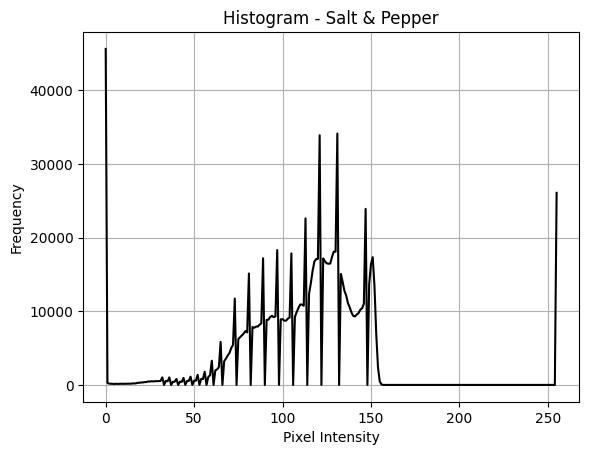

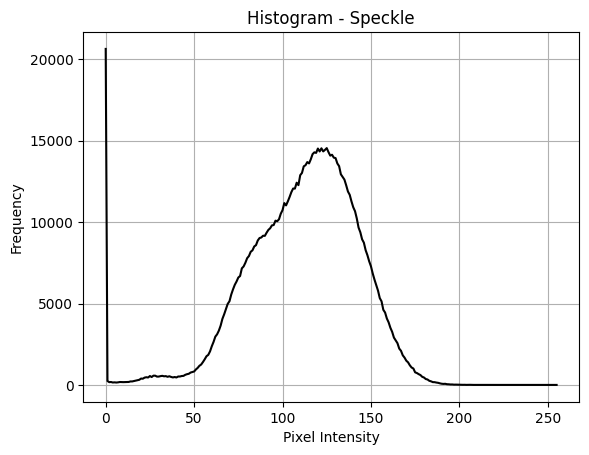

In [4]:
# Step 3: Show Histograms
def plot_histogram(image, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist, color='black')
    plt.title(f'Histogram - {title}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(gaussian_noise, cmap='gray')
plt.title("Gaussian Noise")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sp_noise, cmap='gray')
plt.title("Salt & Pepper Noise")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(speckle_noise, cmap='gray')
plt.title("Speckle Noise")
plt.axis('off')
plt.tight_layout()
plt.show()

plot_histogram(gaussian_noise, "Gaussian")
plot_histogram(sp_noise, "Salt & Pepper")
plot_histogram(speckle_noise, "Speckle")

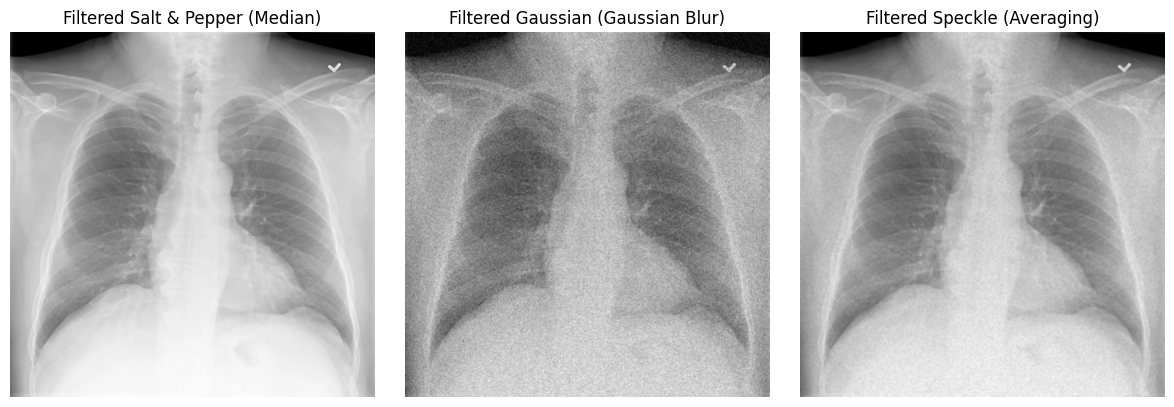

In [5]:
# Step 4: Apply Filters to Remove Noise
median_filtered = cv2.medianBlur(sp_noise, 5)
gaussian_filtered = cv2.GaussianBlur(gaussian_noise, (5, 5), 0)
avg_filtered = cv2.blur(speckle_noise, (5, 5))

# Step 5: Display Filtered Images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(median_filtered, cmap='gray')
plt.title("Filtered Salt & Pepper (Median)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Filtered Gaussian (Gaussian Blur)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(avg_filtered, cmap='gray')
plt.title("Filtered Speckle (Averaging)")
plt.axis('off')
plt.tight_layout()
plt.show()